In [86]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import time

In [87]:
page = 1
rows =[]
while True:
    params = {
    "auth_token": YOUR_API,
    "currencies": "BTC",
    "kind": "news",
    "public": "true",
    "page" : page
    }
    response = requests.get("https://cryptopanic.com/api/developer/v2/posts/", params=params)
    if response.status_code == 200:
        data = response.json()
        print(data)
        if not data["results"]:
            break
        for result in data["results"]:
            rows.append({
                "date": result['published_at'],
                "title": result['title'],
                "description": result['description']
            })
    else:
        print(f"Error: {response.status_code}")
    page += 1
    time.sleep(0.5)
    
df = pd.DataFrame(rows)
print(df.head())

NameError: name 'YOUR_API' is not defined

I couldnt use it for my project because i had only demo account. I decided to use other dataset.

In [ ]:
news_currency = pd.read_csv("path/to/local/csv")

In [ ]:
currency = pd.read_csv("path/to/local/csv")

In [90]:
currency.head()

,id,code,name
0,91,BTC,Bitcoin
1,92,ETH,Ethereum
2,93,USDT,Tether
3,94,USDC,USD Coin
4,95,BNB,BNB


In [91]:
news_currency.head()

,newsId,currencyId
0,887,91
1,892,91
2,900,91
3,911,91
4,912,91


In [92]:
nessesary_newsID = news_currency.loc[news_currency['currencyId']==91]

In [ ]:
df = pd.read_csv("path/to/local/csv")

In [94]:
df.head()

,id,title,description,sourceId,sourceUrl,newsDatetime,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments
0,873,ApeCoin Community Votes to Stay on Ethereum,NaN,2,NaN,2022-06-09 06:57:15,https://cryptopanic.com/news/15444990/ApeCoin-...,0,0,0,0,0,0,0,0,0
1,875,Terraform Labs Co-Founder Denies Accusations o...,NaN,2,NaN,2022-06-09 06:03:33,https://cryptopanic.com/news/15443520/Terrafor...,0,0,0,1,0,0,0,0,0
2,876,Anchor dev claims he warned Do Kwon over unsus...,NaN,7,NaN,2022-06-09 05:39:22,https://cryptopanic.com/news/15442676/Anchor-d...,1,0,1,0,0,0,0,0,0
3,877,"With 12 Key Measures of Prices, Truflation’s R...",NaN,11,NaN,2022-06-09 05:32:52,https://cryptopanic.com/news/15442724/With-12-...,0,0,0,0,0,0,0,0,0
4,878,'Father' of the Metaverse Neal Stephenson laun...,NaN,7,NaN,2022-06-09 05:28:31,https://cryptopanic.com/news/15442350/Father-o...,0,1,0,2,0,0,0,0,0


In [95]:
df_btc = df[df['id'].isin(nessesary_newsID['newsId'])]

In [96]:
df_btc.head()

,id,title,description,sourceId,sourceUrl,newsDatetime,url,negative,positive,important,liked,disliked,lol,toxic,saved,comments
12,887,"TA: Bitcoin Stuck In Key Range, Why A Major Br...",NaN,11,NaN,2022-06-09 03:08:36,https://cryptopanic.com/news/15442102/TA-Bitco...,1,0,0,0,0,0,0,0,0
17,892,Bitcoin Trading Can Become Easier if You Follo...,NaN,12,NaN,2022-06-09 02:40:00,https://cryptopanic.com/news/15442064/Bitcoin-...,0,0,0,0,0,0,0,1,0
24,900,Gillibrand and Lummis state that most altcoins...,NaN,7,NaN,2022-06-09 01:15:34,https://cryptopanic.com/news/15441916/Gillibra...,0,1,1,1,0,0,0,1,1
32,911,U.S. Macro Pressure Responsible For Entire Bit...,There have been multiple sell-off trends recor...,11,https://www.newsbtc.com/news/bitcoin/u-s-macro...,2022-06-08 23:00:19,https://cryptopanic.com/news/15441620/US-Macro...,2,1,0,1,3,1,0,0,0
33,912,Shock And Awe: Bitcoin Lightning Network Capac...,NaN,5,NaN,2022-06-08 23:00:17,https://cryptopanic.com/news/15441649/Shock-An...,0,1,1,1,0,0,0,0,0


In [97]:
len(df_btc)

26065

In [98]:
len(df_btc[df_btc['description'].notnull()])

6848

In [99]:
df_btc['title'].dropna().str.split().apply(len).mean()

np.float64(12.117552273163247)

In [100]:
df_btc_filtered = df_btc.drop(columns=['id', 'sourceId', 'description', 'sourceUrl', 'liked', 'disliked', 'lol', 'toxic', 'saved','comments', 'url', 'negative', 'positive', 'important' ])

In [101]:
df_btc_filtered.head()

,title,newsDatetime
12,"TA: Bitcoin Stuck In Key Range, Why A Major Br...",2022-06-09 03:08:36
17,Bitcoin Trading Can Become Easier if You Follo...,2022-06-09 02:40:00
24,Gillibrand and Lummis state that most altcoins...,2022-06-09 01:15:34
32,U.S. Macro Pressure Responsible For Entire Bit...,2022-06-08 23:00:19
33,Shock And Awe: Bitcoin Lightning Network Capac...,2022-06-08 23:00:17


Now I check sentiment by a few models and compare

In [102]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/master_g/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [103]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

In [104]:
df_btc_filtered['compound_vader'] = df_btc_filtered['title'].apply(lambda x: vader_analyzer.polarity_scores(x)['compound'])

In [105]:
df_btc_filtered['compound_vader'].head(10)

12   -0.2500
17    0.4215
24    0.3535
32    0.0258
33   -0.3400
34   -0.3400
39    0.6369
40    0.0000
44    0.0000
46    0.2732
Name: compound_vader, dtype: float64

In [106]:
from textblob import TextBlob

df_btc_filtered['compound_blob'] = df_btc_filtered['title'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [107]:
from afinn import Afinn

afinn = Afinn()
df_btc_filtered['afinn_score'] = df_btc_filtered['title'].apply(lambda x: afinn.score(x))

In [108]:
#Scale to see histogram with scores differences
df_btc_filtered['afinn_scaled'] = df_btc_filtered.apply(
    lambda row: max(min(row['afinn_score'] / len(row['title'].split()), 1), -1),
    axis=1
)

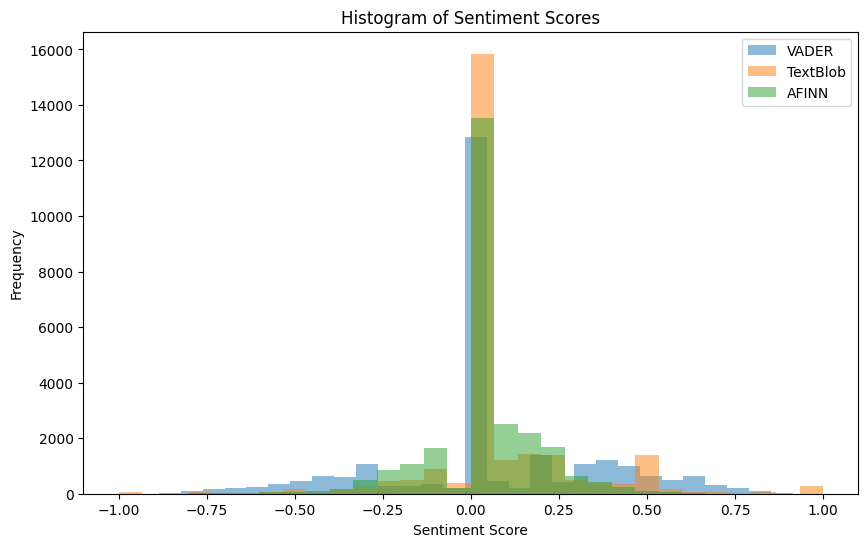

In [109]:
plt.figure(figsize=(10,6))
plt.hist(df_btc_filtered['compound_vader'], bins=30, alpha=0.5, label='VADER')
plt.hist(df_btc_filtered['compound_blob'], bins=30, alpha=0.5, label='TextBlob')
plt.hist(df_btc_filtered['afinn_scaled'], bins=30, alpha=0.5, label='AFINN')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Sentiment Scores')
plt.show()

In [110]:
df_btc_filtered['newsDatetime'] = pd.to_datetime(df_btc_filtered['newsDatetime'])

# Grupowanie dzienne i obliczanie średniego sentymentu
daily_sentiment = (
    df_btc_filtered
    .assign(Date=df_btc_filtered['newsDatetime'].dt.floor('D'))
    .groupby('Date')[['compound_vader', 'compound_blob', 'afinn_scaled']]
    .mean()
    .reset_index()
)

In [111]:
import yfinance as yf

btc_data = yf.download('BTC-USD', start='2020-01-01', end='2025-05-21', interval='1d')
btc_data.reset_index(inplace=True)  
btc_data['Date'] = btc_data['Date'].dt.date  

[*********************100%***********************]  1 of 1 completed


In [112]:
btc_data.head(-1)

Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
...,...,...,...,...,...,...
1961,2025-05-15,103744.640625,104153.617188,101440.812500,103538.828125,50408241840
1962,2025-05-16,103489.289062,104533.484375,103137.476562,103735.656250,44386499364
1963,2025-05-17,103191.085938,103716.945312,102659.179688,103489.289062,37898552742


In [113]:
btc_data = btc_data[['Date', 'Close', 'Volume']]
btc_data.columns = btc_data.columns.get_level_values(0)

In [114]:
print(btc_data['Date'].head())
print(btc_data['Date'].dtype)


0    2020-01-01
1    2020-01-02
2    2020-01-03
3    2020-01-04
4    2020-01-05
Name: Date, dtype: object
object


In [115]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

In [116]:
start_date = pd.Timestamp(2021, 1, 1)
end_date = pd.Timestamp(2025, 4, 1)

# Filtrowanie
daily_sentiment = daily_sentiment[(daily_sentiment['Date'] >= start_date) & (daily_sentiment['Date'] <= end_date)]
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date) & (btc_data['Date'] <= end_date)]

In [117]:
results = pd.merge(daily_sentiment, btc_data_filtered, how='left', on='Date')

In [118]:
results.head(-1)

,Date,compound_vader,compound_blob,afinn_scaled,Close,Volume
0,2021-01-03,0.000000,0.000000,0.000000,32782.023438,78665235202
1,2021-01-04,-0.238350,-0.250000,-0.083333,31971.914062,81163475344
2,2021-01-05,0.484700,0.000000,0.085714,33992.429688,67547324782
3,2021-01-06,0.000000,0.062500,0.000000,36824.363281,75289433811
4,2021-01-07,0.000000,0.000000,0.000000,39371.042969,84762141031
...,...,...,...,...,...,...
1469,2025-03-27,0.013839,0.060136,-0.025574,87177.101562,24413471941
1470,2025-03-28,0.046178,0.089929,0.026645,84353.148438,34198619509
1471,2025-03-29,0.107085,0.079932,0.057961,82597.585938,16969396135
1472,2025-03-30,-0.010771,0.126020,0.020833,82334.523438,14763760943


In [119]:
monthly = (
    results
      .set_index('Date')            
      .resample('M')                
      .mean()[['compound_vader', 'compound_blob', 'afinn_scaled', 'Close']]
      .reset_index()
)



/tmp/ipykernel_2732/4182457309.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


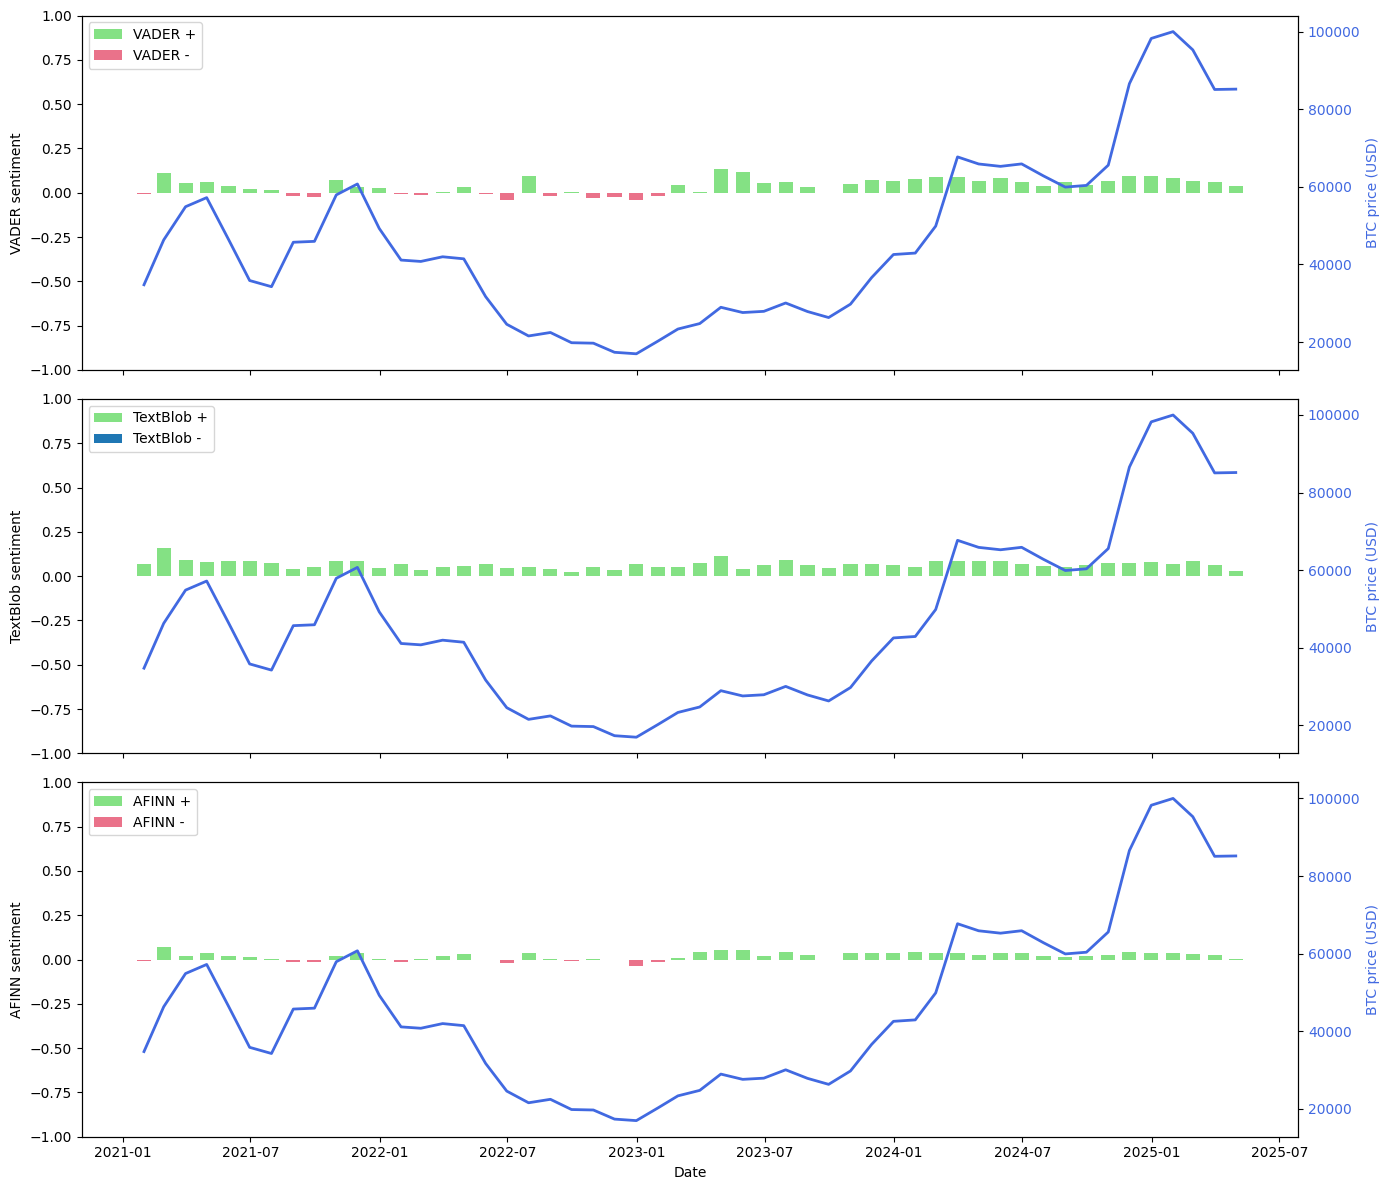

In [120]:
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

models = [
    ('compound_vader', 'VADER'),
    ('compound_blob', 'TextBlob'),
    ('afinn_scaled', 'AFINN')
]

for ax, (col, label) in zip(axs, models):
    # Cena BTC
    ax_price = ax.twinx()
    ax_price.plot(monthly['Date'], monthly['Close'], color='royalblue', linewidth=2, label='BTC – mies. średnia')
    ax_price.set_ylabel('BTC price (USD)', color='royalblue')
    ax_price.tick_params(axis='y', labelcolor='royalblue')
    
    # Słupki sentymentu
    pos = monthly[monthly[col] >= 0]
    neg = monthly[monthly[col] < 0]
    bar_width = 20
    ax.bar(pos['Date'], pos[col], color='limegreen', width=bar_width, alpha=0.6, label=f'{label} +')
    ax.bar(neg['Date'], neg[col], color='crimson', width=bar_width, alpha=0.6, label=f'{label} -')
    
    ax.set_ylabel(f'{label} sentiment')
    ax.set_ylim(-1, 1)
    ax.legend(loc='upper left')

axs[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()
